In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
train=pd.read_csv("Train.csv")

In [4]:
test=pd.read_csv('Test.csv')

In [5]:
df=pd.concat([train,test])

In [6]:
df.head()

,feature_0,feature_1,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,labels
0,-0.276515,-0.424429,0,0,0,0,10,2,1.344997,-0.012283,0.076230,1.076648,0.182198,3,0,1,1.0
1,0.853573,0.150991,0,1,0,0,0,3,0.503892,-0.979179,-0.569351,-0.411453,-0.251940,4,1,2,0.0
2,0.947747,-0.173832,0,0,0,0,5,3,1.825628,-0.703478,0.076230,-0.411453,-0.251940,6,1,2,0.0
3,0.853573,-0.381404,0,1,0,0,5,3,0.984523,-0.039464,-0.569351,-0.411453,-0.251940,4,0,2,0.0
4,1.324443,1.590527,0,0,0,0,8,3,-1.178318,-0.097711,-0.246560,-0.411453,-0.251940,0,1,1,0.0


In [7]:
df.duplicated().sum()

0

In [8]:
df.isna().sum()

feature_0         0
feature_1         0
feature_10        0
feature_11        0
feature_12        0
feature_13        0
feature_14        0
feature_15        0
feature_2         0
feature_3         0
feature_4         0
feature_5         0
feature_6         0
feature_7         0
feature_8         0
feature_9         0
labels        11303
dtype: int64

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
feature_0,45211.0,2.066084e-16,1.000011,-2.159994,-0.747384,-0.182341,0.665225,5.091402
feature_1,45211.0,-8.085098e-17,1.000011,-3.081149,-0.423772,-0.300280,0.021587,33.094776
feature_10,45211.0,1.802659e-02,0.133049,0.000000,0.000000,0.000000,0.000000,1.000000
feature_11,45211.0,5.558382e-01,0.496878,0.000000,0.000000,1.000000,1.000000,1.000000
feature_12,45211.0,1.602265e-01,0.366820,0.000000,0.000000,0.000000,0.000000,1.000000
feature_13,45211.0,6.402424e-01,0.897951,0.000000,0.000000,0.000000,2.000000,2.000000
feature_14,45211.0,5.523014e+00,3.006911,0.000000,3.000000,6.000000,8.000000,11.000000
feature_15,45211.0,2.559974e+00,0.989059,0.000000,3.000000,3.000000,3.000000,3.000000
feature_2,45211.0,-6.663646e-17,1.000011,-1.779108,-0.938003,0.023260,0.624050,1.825628
feature_3,45211.0,8.399421e-17,1.000011,-1.002478,-0.602517,-0.303517,0.236237,18.094700


In [10]:
df.labels.value_counts()

0.0    29941
1.0     3967
Name: labels, dtype: int64

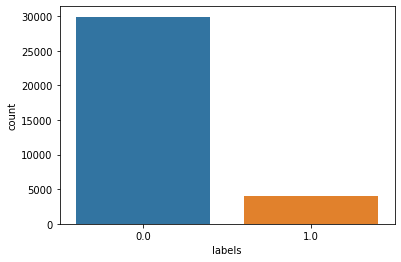

In [11]:
sns.countplot(df.labels)

In [12]:
df.drop(columns=['feature_10','feature_14','feature_0'],inplace=True)

In [13]:
train_new=df[df['labels'].notna()]

In [14]:
test_new=df[df['labels'].isna()]

In [15]:
train_new.head()

,feature_1,feature_11,feature_12,feature_13,feature_15,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,labels
0,-0.424429,0,0,0,2,1.344997,-0.012283,0.076230,1.076648,0.182198,3,0,1,1.0
1,0.150991,1,0,0,3,0.503892,-0.979179,-0.569351,-0.411453,-0.251940,4,1,2,0.0
2,-0.173832,0,0,0,3,1.825628,-0.703478,0.076230,-0.411453,-0.251940,6,1,2,0.0
3,-0.381404,1,0,0,3,0.984523,-0.039464,-0.569351,-0.411453,-0.251940,4,0,2,0.0
4,1.590527,0,0,0,3,-1.178318,-0.097711,-0.246560,-0.411453,-0.251940,0,1,1,0.0


In [16]:
X=train_new.loc[:,:'feature_9']

In [17]:
y=train_new['labels']

## Train_test_split

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [19]:
train_x,test_x,train_y,test_y=train_test_split(X,y,test_size=.25,random_state=10)

In [20]:
print(test_x.shape)

(8477, 13)


In [21]:
log_reg=LogisticRegression()

In [22]:
log_reg.fit(train_x,train_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [23]:
test_pred=log_reg.predict(test_x)

In [24]:
train_pred=log_reg.predict(train_x)

In [25]:
print("Train_Accuracy: ",accuracy_score(train_y,train_pred))
print("Test Accuracy :",accuracy_score(test_y,test_pred))

Train_Accuracy:  0.8919822264165782
Test Accuracy : 0.8859266249852542


In [26]:
print(classification_report(test_y,test_pred))

             precision    recall  f1-score   support

        0.0       0.90      0.98      0.94      7439
        1.0       0.60      0.20      0.30      1038

avg / total       0.86      0.89      0.86      8477



In [27]:
print(confusion_matrix(test_y,test_pred))

[[7299  140]
 [ 827  211]]


In [28]:
con_mat=confusion_matrix(test_y,test_pred)

In [29]:
tp=con_mat[1,1]
tp

211

In [30]:
tn=con_mat[0,0]
tn

7299

In [31]:
fp=con_mat[0,1]
fp

140

In [32]:
fn=con_mat[1,0]
fn

827

In [33]:
recalll=tp/(tp+fn)

In [34]:
prec=tp/(tp+fp)

In [35]:
prec,recalll

(0.6011396011396012, 0.20327552986512523)

In [36]:
log_reg.predict_proba(test_x)[:,1]

array([0.27324504, 0.03840091, 0.00457067, ..., 0.07478795, 0.04102724,
       0.13794731])

In [37]:
np.where(log_reg.predict_proba(test_x)[:,1]>.3,1,0)

array([0, 0, 0, ..., 0, 0, 0])

In [38]:
for th in np.arange(0,1.1,0.1):
    test_preds=np.where(log_reg.predict_proba(test_x)[:,1]>th,1,0)
    print("Thresold ",th)
    print(confusion_matrix(test_y,test_preds))
    print("Accuracy Score :",accuracy_score(test_y,test_preds))

Thresold  0.0
[[   0 7439]
 [   0 1038]]
Accuracy Score : 0.12244897959183673
Thresold  0.1
[[5508 1931]
 [ 153  885]]
Accuracy Score : 0.7541583107231332
Thresold  0.2
[[6777  662]
 [ 413  625]]
Accuracy Score : 0.873186268727144
Thresold  0.30000000000000004
[[7101  338]
 [ 618  420]]
Accuracy Score : 0.8872242538633951
Thresold  0.4
[[7237  202]
 [ 750  288]]
Accuracy Score : 0.8876961189099918
Thresold  0.5
[[7299  140]
 [ 827  211]]
Accuracy Score : 0.8859266249852542
Thresold  0.6000000000000001
[[7342   97]
 [ 880  158]]
Accuracy Score : 0.8847469623687625
Thresold  0.7000000000000001
[[7381   58]
 [ 927  111]]
Accuracy Score : 0.8838032322755692
Thresold  0.8
[[7397   42]
 [ 962   76]]
Accuracy Score : 0.881561873304235
Thresold  0.9
[[7415   24]
 [ 991   47]]
Accuracy Score : 0.8802642444260942
Thresold  1.0
[[7439    0]
 [1038    0]]
Accuracy Score : 0.8775510204081632


In [39]:
from sklearn.metrics import roc_auc_score,roc_curve

In [40]:
logit=roc_auc_score(test_y,log_reg.predict(test_x))

In [41]:
fpr,tpr,threshold=roc_curve(test_y,log_reg.predict_proba(test_x)[:,1])

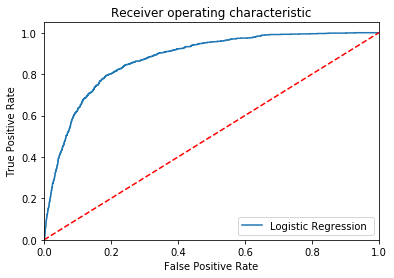

In [42]:
plt.plot(fpr,tpr,label='Logistic Regression '%logit)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

## Model Tunning

In [43]:
corr=df.corr()['labels'].sort_values()

In [44]:
df.columns

Index(['feature_1', 'feature_11', 'feature_12', 'feature_13', 'feature_15',
       'feature_2', 'feature_3', 'feature_4', 'feature_5', 'feature_6',
       'feature_7', 'feature_8', 'feature_9', 'labels'],
      dtype='object')

In [45]:
corr

feature_13   -0.148583
feature_11   -0.135662
feature_15   -0.079190
feature_4    -0.075025
feature_12   -0.065480
feature_2    -0.033345
feature_7     0.038588
feature_8     0.046193
feature_1     0.048611
feature_9     0.068356
feature_5     0.106239
feature_6     0.119322
feature_3     0.392971
labels        1.000000
Name: labels, dtype: float64

In [46]:
for col in df.columns:
    print(col, df[col].nunique())

feature_1 7168
feature_11 2
feature_12 2
feature_13 3
feature_15 4
feature_2 31
feature_3 1573
feature_4 48
feature_5 559
feature_6 41
feature_7 12
feature_8 3
feature_9 4
labels 2


In [ ]:
def outlier(data):
    for i in df[data]:
        print((df[data].mean()-i)/df[data].std())
        

In [48]:
from imblearn.over_sampling import SMOTE

In [49]:
smote=SMOTE()

In [50]:
df.columns

Index(['feature_1', 'feature_11', 'feature_12', 'feature_13', 'feature_15',
       'feature_2', 'feature_3', 'feature_4', 'feature_5', 'feature_6',
       'feature_7', 'feature_8', 'feature_9', 'labels'],
      dtype='object')

In [51]:
smote_x,smote_y=smote.fit_sample(train_x.astype('float'),train_y)

In [52]:
from collections import Counter
print("Before Smote: ",Counter(train_y))
print("After Smote: ",Counter(smote_y))

Before Smote:  Counter({0.0: 22502, 1.0: 2929})
After Smote:  Counter({0.0: 22502, 1.0: 22502})


In [53]:
log_reg.fit(smote_x,smote_y)
test_pred=log_reg.predict(test_x)
print("Accuracy score: ",accuracy_score(test_y,test_pred))
print(confusion_matrix(test_y,test_pred))
print(classification_report(test_y,test_pred))

Accuracy score:  0.8140851716409107
[[6079 1360]
 [ 216  822]]
             precision    recall  f1-score   support

        0.0       0.97      0.82      0.89      7439
        1.0       0.38      0.79      0.51      1038

avg / total       0.89      0.81      0.84      8477



In [55]:
np.where(log_reg.predict_proba(test_x)[:,1]>0.3,1,0)

array([1, 0, 0, ..., 1, 0, 1])

In [56]:
for th in np.arange(0,1.1,0.1):
    test_preds=np.where(log_reg.predict_proba(test_x)[:,1]>th,1,0)
    print("Threshold is :",th)
    print(confusion_matrix(test_y,test_preds))

Threshold is : 0.0
[[   0 7439]
 [   0 1038]]
Threshold is : 0.1
[[2339 5100]
 [  10 1028]]
Threshold is : 0.2
[[3804 3635]
 [  46  992]]
Threshold is : 0.30000000000000004
[[4720 2719]
 [  89  949]]
Threshold is : 0.4
[[5459 1980]
 [ 147  891]]
Threshold is : 0.5
[[6079 1360]
 [ 216  822]]
Threshold is : 0.6000000000000001
[[6521  918]
 [ 323  715]]
Threshold is : 0.7000000000000001
[[6819  620]
 [ 443  595]]
Threshold is : 0.8
[[7042  397]
 [ 586  452]]
Threshold is : 0.9
[[7243  196]
 [ 756  282]]
Threshold is : 1.0
[[7439    0]
 [1038    0]]
